In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
df = pd.read_csv("insurance.csv")

# Data Understanding, EDA

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
print(df.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [8]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [9]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
num_variables = ['age','bmi','children','smoker','sex']

In [13]:
df[num_variables + ['charges']].corr()

,age,bmi,children,smoker,sex,charges
age,1.000000,0.109272,0.042469,-0.025019,-0.020856,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.046371,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.017163,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.076185,0.787251
sex,-0.020856,0.046371,0.017163,0.076185,1.000000,0.057292
charges,0.299008,0.198341,0.067998,0.787251,0.057292,1.000000


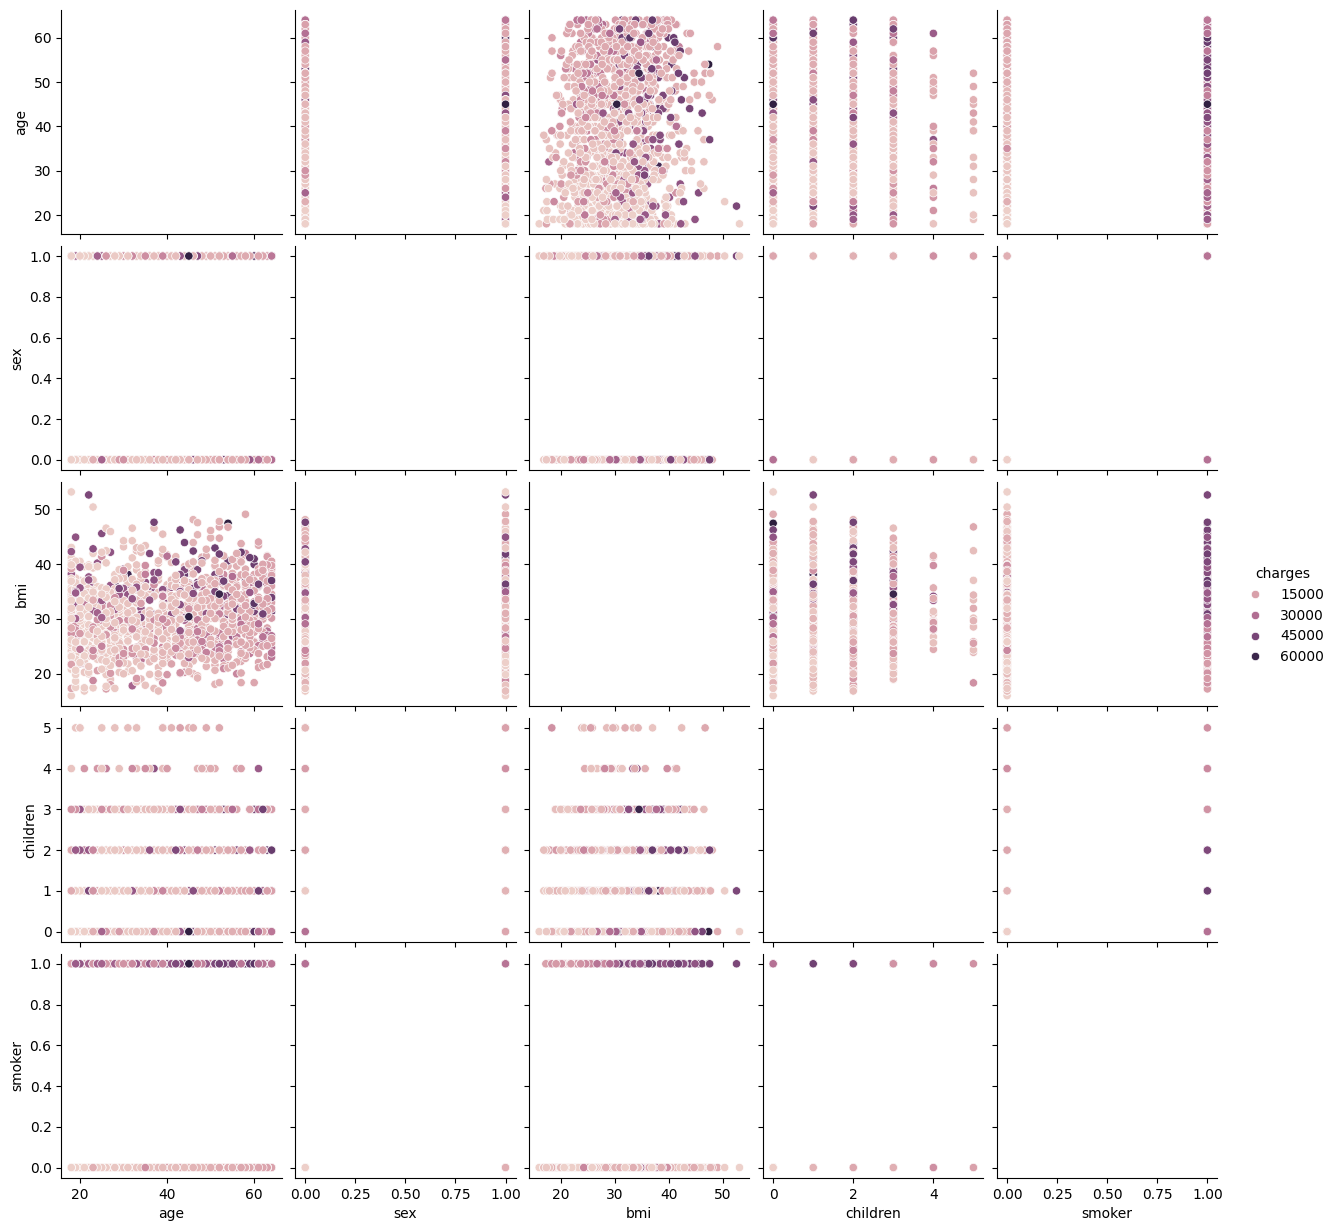

In [14]:
sns.pairplot(df, hue='charges')
plt.show()

In [15]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

# Data Preprocessing 

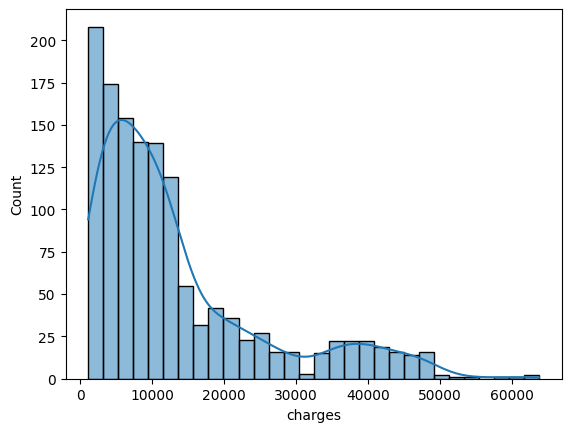

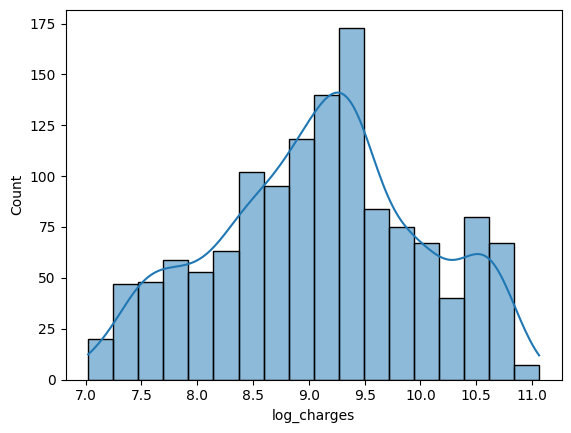

In [16]:
sns.histplot(df['charges'], kde = True)
plt.show()
df['log_charges'] = np.log(df['charges'])
sns.histplot(df['log_charges'], kde = True)
plt.show()

In [17]:
df[num_variables + ['log_charges']].corr()

,age,bmi,children,smoker,sex,log_charges
age,1.000000,0.109272,0.042469,-0.025019,-0.020856,0.527834
bmi,0.109272,1.000000,0.012759,0.003750,0.046371,0.132669
children,0.042469,0.012759,1.000000,0.007673,0.017163,0.161336
smoker,-0.025019,0.003750,0.007673,1.000000,0.076185,0.665506
sex,-0.020856,0.046371,0.017163,0.076185,1.000000,0.005632
log_charges,0.527834,0.132669,0.161336,0.665506,0.005632,1.000000


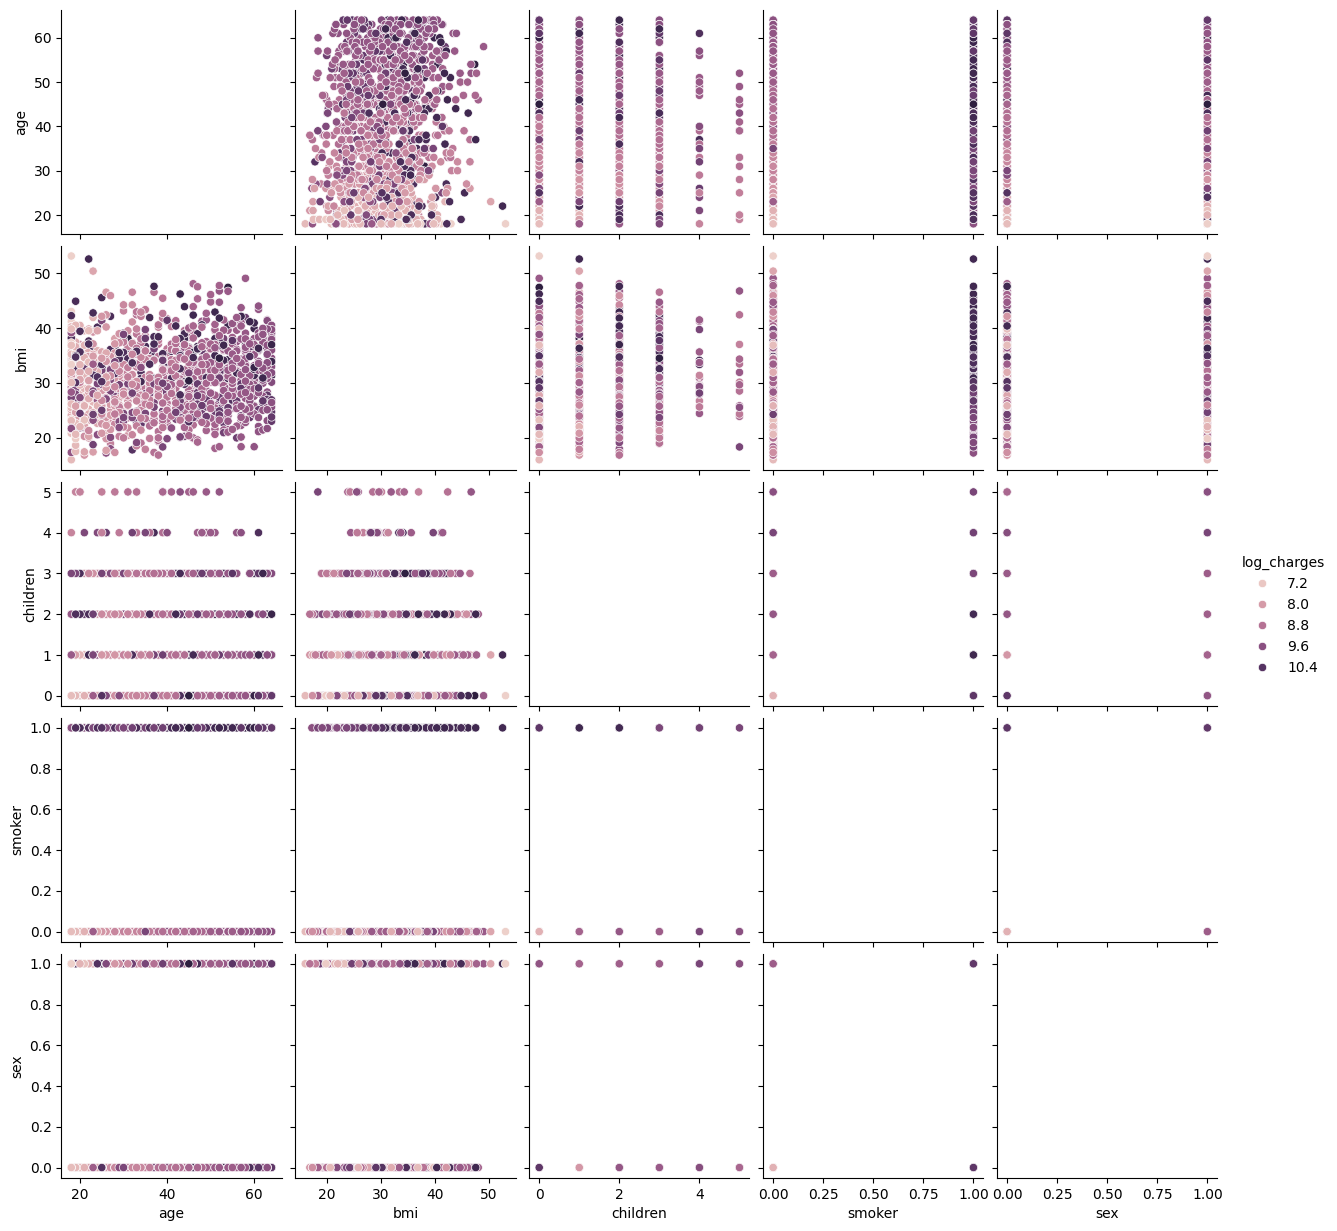

In [18]:
sns.pairplot(df[num_variables + ['log_charges']], hue='log_charges')
plt.show()

In [19]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [20]:
df["High_Claim"] = df["charges"] >= df["charges"].median()

# Model Building

In [21]:
df

,age,sex,bmi,children,smoker,charges,log_charges,region_northwest,region_southeast,region_southwest,High_Claim
0,19,0,27.900,0,1,16884.92400,9.734176,False,False,True,True
1,18,1,33.770,1,0,1725.55230,7.453302,False,True,False,False
2,28,1,33.000,3,0,4449.46200,8.400538,False,True,False,False
3,33,1,22.705,0,0,21984.47061,9.998092,True,False,False,True
4,32,1,28.880,0,0,3866.85520,8.260197,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,9.268661,True,False,False,True
1334,18,0,31.920,0,0,2205.98080,7.698927,False,False,False,False
1335,18,0,36.850,0,0,1629.83350,7.396233,False,True,False,False
1336,21,0,25.800,0,0,2007.94500,7.604867,False,False,True,False


In [22]:
X = df.drop(['High_Claim','charges','log_charges'], axis =1)
y = df['High_Claim']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Model Evaluation

## Confusion Matrix

In [25]:
print(confusion_matrix(y_test, predictions))

[[131  15]
 [  9 113]]


## Accuracy, Precision, Recall, F1 Score

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.94      0.90      0.92       146
        True       0.88      0.93      0.90       122

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



## Feature importance

In [27]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Odds_Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

print(feature_importance)

            Feature  Odds_Ratio
4            smoker  468.924884
0               age    1.158316
3          children    1.066455
2               bmi    1.033335
1               sex    0.791899
5  region_northwest    0.716119
6  region_southeast    0.572176
7  region_southwest    0.518545


## Display of FP/FN

In [31]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = predictions

false_positives = results[(results['Actual'] == 0) & (results['Predicted'] == 1)]

false_negatives = results[(results['Actual'] == 1) & (results['Predicted'] == 0)]

print(f"--- FALSE POSITIVES ({len(false_positives)}) ---")
display(false_positives)

print(f"\n--- FALSE NEGATIVES ({len(false_negatives)}) ---")
display(false_negatives)

--- FALSE POSITIVES (15) ---


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,Actual,Predicted
764,45,0,25.175,2,0,False,False,False,False,True
777,45,1,39.805,0,0,False,False,False,False,True
1280,48,0,33.330,0,0,False,True,False,False,True
1052,49,1,29.830,1,0,False,False,False,False,True
81,45,0,38.285,0,0,False,False,False,False,True
610,47,0,29.370,1,0,False,True,False,False,True
622,49,0,21.300,1,0,False,False,True,False,True
1024,47,0,45.320,1,0,False,True,False,False,True
605,51,0,34.100,0,0,False,True,False,False,True
351,50,0,25.600,0,0,False,False,True,False,True



--- FALSE NEGATIVES (9) ---


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,Actual,Predicted
429,27,0,30.400,3,0,True,False,False,True,False
1253,40,0,29.300,4,0,False,False,True,True,False
806,40,0,41.420,1,0,True,False,False,True,False
430,19,1,33.100,0,0,False,False,True,True,False
353,33,1,35.245,0,0,False,False,False,True,False
291,29,1,29.640,1,0,False,False,False,True,False
1039,19,1,27.265,2,0,True,False,False,True,False
306,28,0,27.500,2,0,False,False,True,True,False
858,25,0,32.230,1,0,False,True,False,True,False


# Checking smoker repartition between Low Claim and High Claim

In [32]:
check = pd.crosstab(df['smoker'], df['High_Claim'])
print(check)

High_Claim  False  True 
smoker                  
0             669    395
1               0    274


## ROC curve and AUC Score

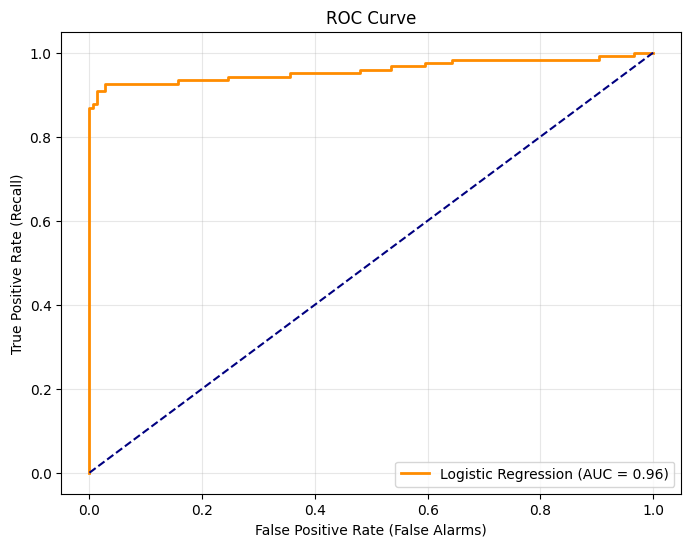

The AUC Score is: 0.9590163934426229


In [33]:
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # The "Random Guess" line
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"The AUC Score is: {auc}")

In [34]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# 2. Calculate Odds Ratio (e to the power of the coefficient)
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

# 3. Sort by Odds Ratio to see which factors increase risk the most
factors_increasing_prob = coef_df.sort_values(by='Odds_Ratio', ascending=False)
print(factors_increasing_prob)

            Feature  Coefficient  Odds_Ratio
4            smoker     6.150443  468.924884
0               age     0.146967    1.158316
3          children     0.064340    1.066455
2               bmi     0.032791    1.033335
1               sex    -0.233322    0.791899
5  region_northwest    -0.333909    0.716119
6  region_southeast    -0.558308    0.572176
7  region_southwest    -0.656728    0.518545
